# Titanic: Machine Learning from Disaster

# End to End ML PipeLine


In [1]:
"""
The pipeline Summary:
1) Introduction
    Import Libraries
    Load data
    Run Statistical summeries
    Figure out missing value columns
2) Visualizations
    Correlation with target variable
3) Missing values imputation
    train data Missing columns- Embarked,Age,Cabin
    test data Missing columns- Age and Fare
4) Feature Engineering
    Calculate total family size
    Get title from name
    Find out which deck passenger belonged to
    Dealing with Categorical Variables
    Label encoding
    Feature Scaling
5) Prediction
    Split into training & test sets
    Build the model
    Feature importance
    Predictions
    Ensemble : Majority voting
6) Submission
"""

'\nThe pipeline Summary:\n1) Introduction\n    Import Libraries\n    Load data\n    Run Statistical summeries\n    Figure out missing value columns\n2) Visualizations\n    Correlation with target variable\n3) Missing values imputation\n    train data Missing columns- Embarked,Age,Cabin\n    test data Missing columns- Age and Fare\n4) Feature Engineering\n    Calculate total family size\n    Get title from name\n    Find out which deck passenger belonged to\n    Dealing with Categorical Variables\n    Label encoding\n    Feature Scaling\n5) Prediction\n    Split into training & test sets\n    Build the model\n    Feature importance\n    Predictions\n    Ensemble : Majority voting\n6) Submission\n'

In [2]:
import pandas as pd

import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# Load data sets
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


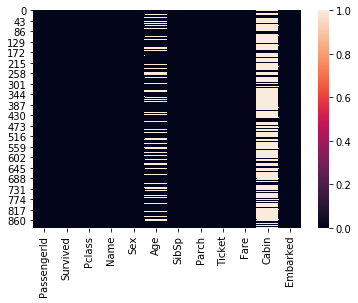

In [4]:
sns.heatmap(train.isnull())

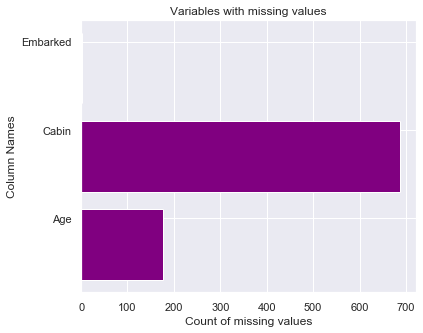

In [5]:
#pd.options.display.mpl_style = 'default'
sns.set(font_scale=1)

labels = []
values = []
null_columns=train.columns[train.isnull().any()]
for col in null_columns:
    labels.append(col)
    values.append(train[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

# Visualization:

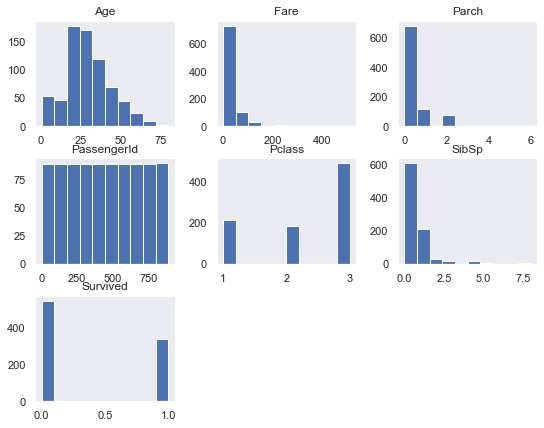

In [6]:
train.hist(bins=10,figsize=(9,7),grid=False);

# we can see that Age and Fare are measured on very different scaling. 
# So we need to do feature scaling before predictions.

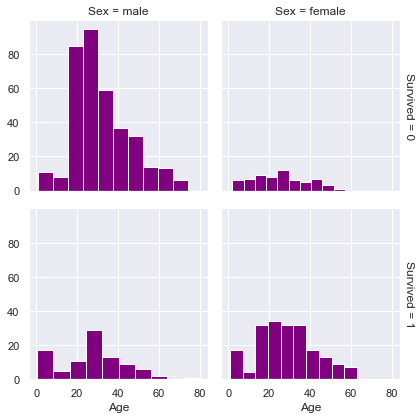

In [7]:
g = sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

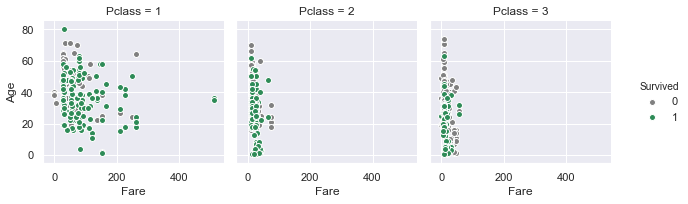

In [8]:
g = sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True, palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

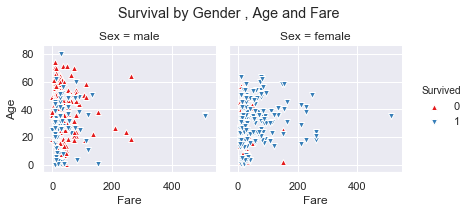

In [9]:
g = sns.FacetGrid(train, hue="Survived", col="Sex", margin_titles=True,palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

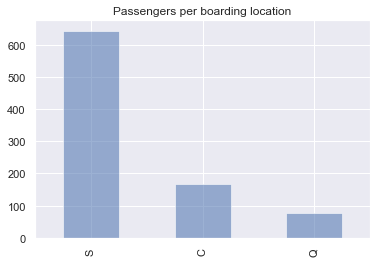

In [10]:
train.Embarked.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Passengers per boarding location");

//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


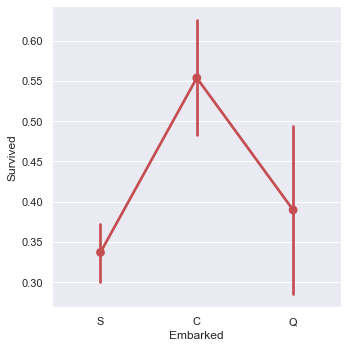

In [11]:
sns.factorplot(x = 'Embarked',y="Survived", data = train,color="r");

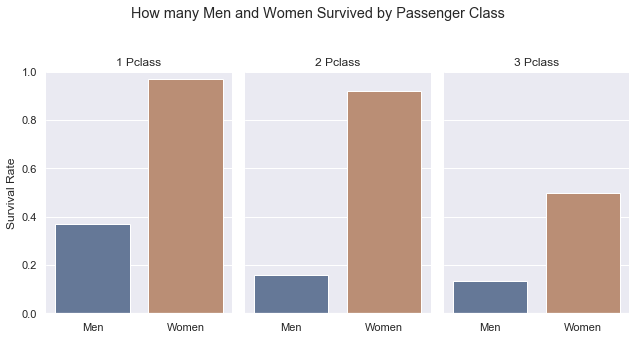

In [12]:
sns.set(font_scale=1)
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                    data=train, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

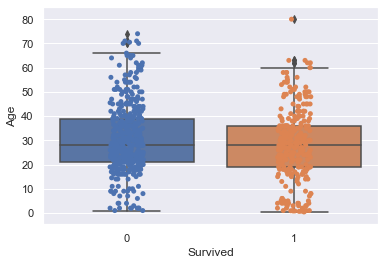

In [13]:
ax = sns.boxplot(x="Survived", y="Age", 
                data=train)
ax = sns.stripplot(x="Survived", y="Age",
                   data=train, jitter=True,
                   edgecolor="gray")
#sns.plt.title("Survival by Age",fontsize=12);

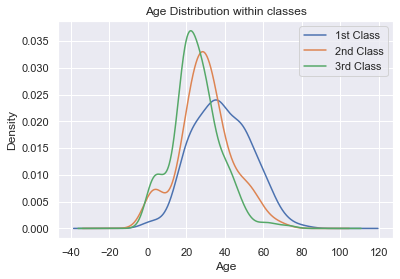

In [14]:
train.Age[train.Pclass == 1].plot(kind='kde')    
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

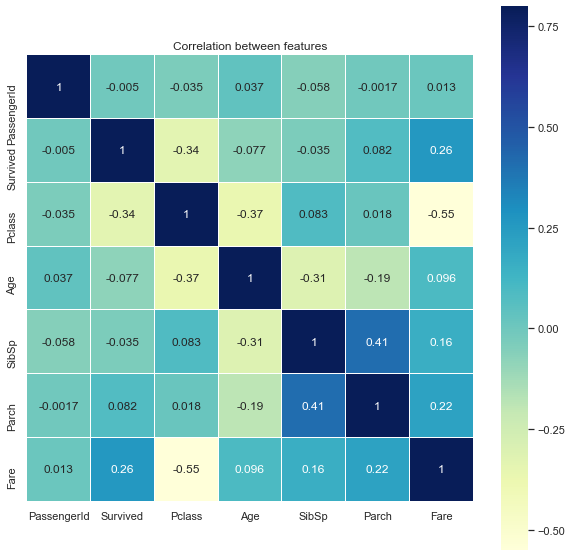

In [15]:
corr=train.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [16]:
#correlation of features with target variable
train.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [17]:
#Looks like Pclass has got highest negative correlation with "Survived" followed by Fare, Parch and Age

//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


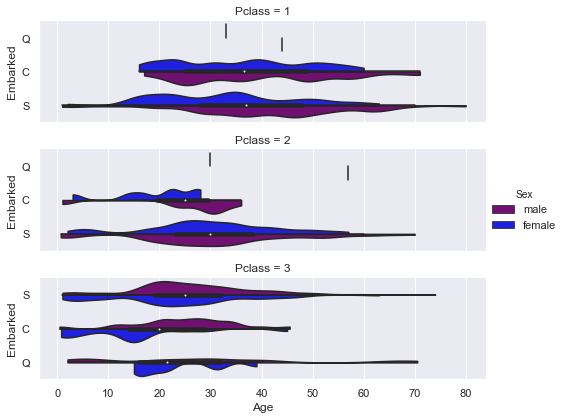

In [18]:
g = sns.factorplot(x="Age", y="Embarked",
                    hue="Sex", row="Pclass",
                    data=train[train.Embarked.notnull()],
                    orient="h", size=2, aspect=3.5, 
                   palette={'male':"purple", 'female':"blue"},
                    kind="violin", split=True, cut=0, bw=.2);

# Missing Value Imputation over train

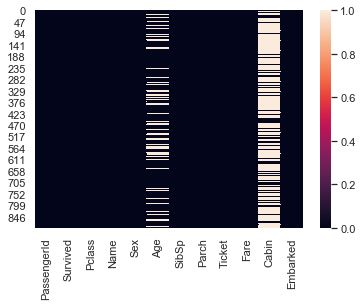

In [19]:
sns.heatmap(train.isnull())

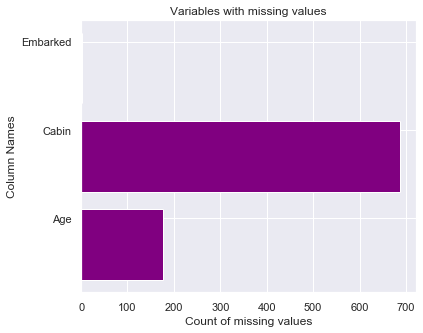

In [20]:
#pd.options.display.mpl_style = 'default'
sns.set(font_scale=1)

labels = []
values = []
null_columns=train.columns[train.isnull().any()]
for col in null_columns:
    labels.append(col)
    values.append(train[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

In [21]:
# Embarked
train[train['Embarked'].isnull()]
# 2 missing values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
#PassengerId 62 and 830 have missing embarked values
#Both have Passenger class 1 and fare $80.
#Lets plot a graph to visualize and try to guess from where they embarked

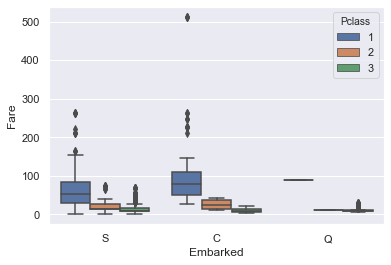

In [23]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train);

In [24]:
train["Embarked"] = train["Embarked"].fillna('C')
# We can see that for 1st class median line is coming around fare $80 for embarked value 'C'. 
#So we can replace NA values in Embarked column with 'C'

In [25]:
# Now we have to make object as int in Embarke: We know it has three uniques which are:
# S, C, Q
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [26]:
# Make Sex object as int:
genders = {"male": 0 , "female": 1}
Data = [train, test]

for Dataset in Data:
    Dataset['Sex'] = Dataset['Sex'].map(genders)

In [27]:
# check the Age column to be null-free:
Tot_Null  = train["Age"].isnull().sum()   # Number of all age data
Tot_N     = train["Age"].isnull().count() # Number of Null data
# Take care of nulls on Both train and test:
Data = [train, test]

for Dataset in Data:                       # Pointer
    mean = train["Age"].mean()             # Mean for train set
    std  = test["Age"].std()               # Standard deviation of Age test set
    isN  = Dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=isN) 
    copAge = Dataset["Age"].copy()
    copAge[np.isnan(copAge)] = rand_age
    Dataset["Age"] = copAge
    #train["Age"].astype(int)

# train["Age"].isnull().sum()


# Covert ages to int and then put them in age group: Group ages
for Dataset in Data:
    Dataset["Age"] = Dataset["Age"].astype(int)
    Dataset.loc[Dataset["Age"] <= 5, "Age"] = 0
    Dataset.loc[(Dataset["Age"]> 5) & (Dataset["Age"]<= 10), "Age"] = 1
    Dataset.loc[(Dataset["Age"]> 10) & (Dataset["Age"]<= 15), "Age"] = 2
    Dataset.loc[(Dataset["Age"]> 15) & (Dataset["Age"]<= 20), "Age"] = 3
    Dataset.loc[(Dataset["Age"]> 20) & (Dataset["Age"]<= 25), "Age"] = 4
    Dataset.loc[(Dataset["Age"]> 25) & (Dataset["Age"]<= 30), "Age"] = 5
    Dataset.loc[(Dataset["Age"]> 30) & (Dataset["Age"]<= 35), "Age"] = 6
    Dataset.loc[(Dataset["Age"]> 35) & (Dataset["Age"]<= 40), "Age"] = 7
    Dataset.loc[(Dataset["Age"]> 40) & (Dataset["Age"]<= 45), "Age"] = 8
    Dataset.loc[(Dataset["Age"]> 45) & (Dataset["Age"]<= 60), "Age"] = 9
    Dataset.loc[(Dataset["Age"]> 60) & (Dataset["Age"]<= 70), "Age"] = 10
    Dataset.loc[(Dataset["Age"]> 70), "Age"] = 11

# let's see how it's distributed 
train["Age"].value_counts()

4     152
5     139
3     122
6     121
7     102
9      79
8      64
0      44
2      26
1      20
10     18
11      4
Name: Age, dtype: int64

In [28]:
train["Deck"]=train.Cabin.str[0]
test["Deck"]=test.Cabin.str[0]
train["Deck"].unique() # 0 is for null values


array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


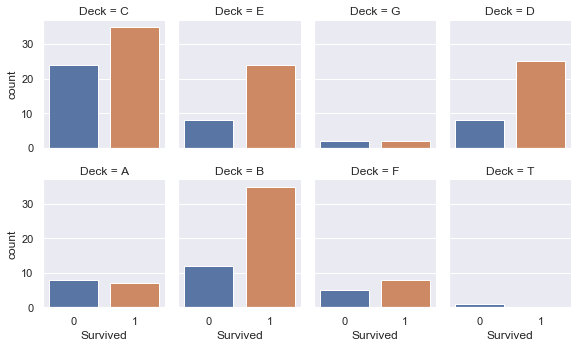

In [29]:
g = sns.factorplot("Survived", col="Deck", col_wrap=4,
                    data=train[train.Deck.notnull()],
                    kind="count", size=2.5, aspect=.8);

In [30]:
train.Deck.fillna('Z', inplace=True)
test.Deck.fillna('Z', inplace=True)
train["Deck"].unique() # Z is for null values

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [31]:
#Convert Categorical variables of Deck into Numerical ones:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEnc=LabelEncoder()
cat_vars=['Deck']
for col in cat_vars:
    train[col]=labelEnc.fit_transform(train[col])
    test[col]=labelEnc.fit_transform(test[col])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,4,1,0,A/5 21171,7.2500,NaN,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,7,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,5,0,0,STON/O2. 3101282,7.9250,NaN,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,6,0,0,373450,8.0500,NaN,0,8


In [32]:
# Cabin object must be taken care of
# Cabin 687 missed data so I will drop it:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

# Missing Value Imputation over test

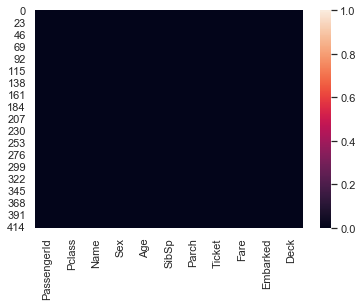

In [33]:
sns.heatmap(test.isnull())

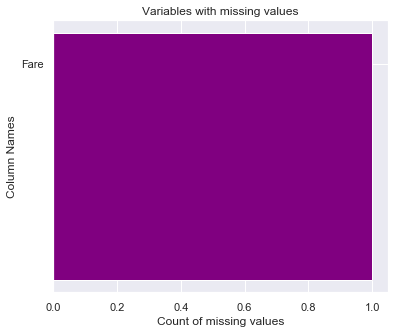

In [34]:
#pd.options.display.mpl_style = 'default'
sns.set(font_scale=1)

labels = []
values = []
null_columns=test.columns[test.isnull().any()]
for col in null_columns:
    labels.append(col)
    values.append(test[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,5))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");

In [35]:
# Fare Column
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
152,1044,3,"Storey, Mr. Thomas",0,9,0,0,3701,NaN,0,7


In [36]:
#we can replace missing value in fare by taking median of all fares of those passengers 
#who share 3rd Passenger class and Embarked from 'S' 
def fill_missing_fare(df):
    median_fare=df[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]['Fare'].median()
#'S'
       #print(median_fare)
    df["Fare"] = df["Fare"].fillna(median_fare)
    return df

test=fill_missing_fare(test)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [37]:
Data = [train, test]

for Dataset in Data:
    Dataset['Fare'] = Dataset['Fare'].fillna(0)
    Dataset['Fare'] = Dataset['Fare'].astype(int)

for Dataset in Data:
    Dataset.loc[ Dataset['Fare'] <= 7.91, 'Fare'] = 0
    Dataset.loc[(Dataset['Fare'] > 7.91) & (Dataset['Fare'] <= 14.454), 'Fare'] = 1
    Dataset.loc[(Dataset['Fare'] > 14.454) & (Dataset['Fare'] <= 31.0), 'Fare']   = 2
    Dataset.loc[(Dataset['Fare'] > 31) & (Dataset['Fare'] <= 50), 'Fare']   = 3
    Dataset.loc[(Dataset['Fare'] > 50) & (Dataset['Fare'] <= 99), 'Fare']   = 4
    Dataset.loc[(Dataset['Fare'] > 99) & (Dataset['Fare'] <= 150), 'Fare']   = 5
    Dataset.loc[(Dataset['Fare'] > 150) & (Dataset['Fare'] <= 250), 'Fare']   = 6
    Dataset.loc[ Dataset['Fare'] > 250, 'Fare'] = 7
    Dataset['Fare'] = Dataset['Fare'].astype(int)

In [38]:
# Family Size:
# Create a family size variable including the passenger themselves
train["FamilySize"] = train["SibSp"] + train["Parch"]+1
test["FamilySize"] = test["SibSp"] + test["Parch"]+1
print(train["FamilySize"].value_counts())

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


In [39]:
# Discretize family size
train.loc[train["FamilySize"] == 1, "FsizeD"] = 'singleton'
train.loc[(train["FamilySize"] > 1)  &  (train["FamilySize"] < 5) , "FsizeD"] = 'small'
train.loc[train["FamilySize"] >4, "FsizeD"] = 'large'

test.loc[test["FamilySize"] == 1, "FsizeD"] = 'singleton'
test.loc[(test["FamilySize"] >1) & (test["FamilySize"] <5) , "FsizeD"] = 'small'
test.loc[test["FamilySize"] >4, "FsizeD"] = 'large'
print(train["FsizeD"].unique())
print(train["FsizeD"].value_counts())

['small' 'singleton' 'large']
singleton    537
small        292
large         62
Name: FsizeD, dtype: int64


In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,FamilySize,FsizeD
0,1,0,3,"Braund, Mr. Owen Harris",0,4,1,0,A/5 21171,0,0,8,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,7,1,0,PC 17599,4,1,2,2,small
2,3,1,3,"Heikkinen, Miss. Laina",1,5,0,0,STON/O2. 3101282,0,0,8,1,singleton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6,1,0,113803,4,0,2,2,small
4,5,0,3,"Allen, Mr. William Henry",0,6,0,0,373450,1,0,8,1,singleton


//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


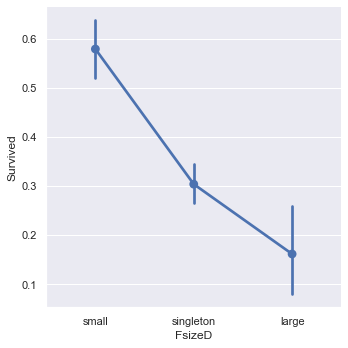

In [41]:
sns.factorplot(x="FsizeD", y="Survived", data=train);


[okay, good, short, long]
Categories (4, object): [short < okay < good < long]


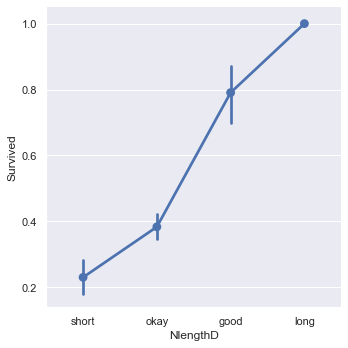

In [42]:
# Length of the Name can shows the class of the person:
#Create feture for length of name 
# The .apply method generates a new series
train["NameLength"] = train["Name"].apply(lambda x: len(x))
test["NameLength"] = test["Name"].apply(lambda x: len(x))

bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
train['NlengthD'] = pd.cut(train['NameLength'], bins, labels=group_names)
test['NlengthD'] = pd.cut(test['NameLength'], bins, labels=group_names)

sns.factorplot(x="NlengthD", y="Survived", data=train)
print(train["NlengthD"].unique())



In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int64
Embarked       891 non-null int64
Deck           891 non-null int64
FamilySize     891 non-null int64
FsizeD         891 non-null object
NameLength     891 non-null int64
NlengthD       891 non-null category
dtypes: category(1), int64(12), object(3)
memory usage: 105.5+ KB


In [44]:
# Whats in the name?

import re

#A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    #If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

#Get all the titles and print how often each one occurs.
titles = train["Name"].apply(get_title)
print(pd.value_counts(titles))


#Add in the title column.
train["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
train.loc[train["Title"] == "Mlle", "Title"] = 'Miss'
train.loc[train["Title"] == "Ms", "Title"] = 'Miss'
train.loc[train["Title"] == "Mme", "Title"] = 'Mrs'
train.loc[train["Title"] == "Dona", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Lady", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Countess", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Capt", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Col", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Don", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Major", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Rev", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Sir", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Jonkheer", "Title"] = 'Rare Title'
train.loc[train["Title"] == "Dr", "Title"] = 'Rare Title'

#titanic.loc[titanic["Title"].isin(['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
#                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']), "Title"] = 'Rare Title'

#titanic[titanic['Title'].isin(['Dona', 'Lady', 'Countess'])]
#titanic.query("Title in ('Dona', 'Lady', 'Countess')")

train["Title"].value_counts()


titles = test["Name"].apply(get_title)
print(pd.value_counts(titles))

#Add in the title column.
test["Title"] = titles

# Titles with very low cell counts to be combined to "rare" level
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

# Also reassign mlle, ms, and mme accordingly
test.loc[test["Title"] == "Mlle", "Title"] = 'Miss'
test.loc[test["Title"] == "Ms", "Title"] = 'Miss'
test.loc[test["Title"] == "Mme", "Title"] = 'Mrs'
test.loc[test["Title"] == "Dona", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Lady", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Countess", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Capt", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Col", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Don", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Major", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Rev", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Sir", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Jonkheer", "Title"] = 'Rare Title'
test.loc[test["Title"] == "Dr", "Title"] = 'Rare Title'

test["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Ms            1
Countess      1
Don           1
Capt          1
Sir           1
Lady          1
Mme           1
Name: Name, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Name, dtype: int64


Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Title, dtype: int64

In [45]:
train["TicketNumber"] = train["Ticket"].str.extract('(\d{2,})', expand=True)
train["TicketNumber"] = train["TicketNumber"].apply(pd.to_numeric)


test["TicketNumber"] = test["Ticket"].str.extract('(\d{2,})', expand=True)
test["TicketNumber"] = test["TicketNumber"].apply(pd.to_numeric)

In [46]:
# Ticket column
train[train["TicketNumber"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
179,180,0,3,"Leonard, Mr. Lionel",0,7,0,0,LINE,0,0,8,1,singleton,19,short,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",0,4,0,0,LINE,0,0,8,1,singleton,28,okay,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",0,3,0,0,LINE,0,0,8,1,singleton,31,okay,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",0,9,0,0,LINE,0,0,8,1,singleton,19,short,Mr,NaN
772,773,0,2,"Mack, Mrs. (Mary)",1,9,0,0,S.O./P.P. 3,1,0,4,1,singleton,17,short,Mrs,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",0,3,0,0,S.O./P.P. 3,1,0,8,1,singleton,24,okay,Mr,NaN


In [47]:
train.TicketNumber.fillna(train["TicketNumber"].median(), inplace=True)
test.TicketNumber.fillna(test["TicketNumber"].median(), inplace=True)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null int64
Age             891 non-null int64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null int64
Embarked        891 non-null int64
Deck            891 non-null int64
FamilySize      891 non-null int64
FsizeD          891 non-null object
NameLength      891 non-null int64
NlengthD        891 non-null category
Title           891 non-null object
TicketNumber    891 non-null float64
dtypes: category(1), float64(1), int64(12), object(4)
memory usage: 119.5+ KB


In [49]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","FsizeD","NlengthD"]
for col in cat_vars:
    train[col]=labelEnc.fit_transform(train[col])
    test[col]=labelEnc.fit_transform(test[col])

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Title,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",0,4,1,0,A/5 21171,0,0,8,2,2,23,2,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,7,1,0,PC 17599,4,1,2,2,2,51,0,3,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",1,5,0,0,STON/O2. 3101282,0,0,8,1,1,22,2,1,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,6,1,0,113803,4,0,2,2,2,44,0,3,113803.0
4,5,0,3,"Allen, Mr. William Henry",0,6,0,0,373450,1,0,8,1,1,24,2,2,373450.0


In [50]:
train.corr()["Survived"]

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex             0.543351
Age            -0.054715
SibSp          -0.035322
Parch           0.081629
Fare            0.320841
Embarked        0.111203
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Title          -0.071174
TicketNumber   -0.096161
Name: Survived, dtype: float64

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null int64
Age             891 non-null int64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null int64
Embarked        891 non-null int64
Deck            891 non-null int64
FamilySize      891 non-null int64
FsizeD          891 non-null int64
NameLength      891 non-null int64
NlengthD        891 non-null int64
Title           891 non-null int64
TicketNumber    891 non-null float64
dtypes: float64(1), int64(15), object(2)
memory usage: 125.4+ KB


In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Name            418 non-null object
Sex             418 non-null int64
Age             418 non-null int64
SibSp           418 non-null int64
Parch           418 non-null int64
Ticket          418 non-null object
Fare            418 non-null int64
Embarked        418 non-null int64
Deck            418 non-null int64
FamilySize      418 non-null int64
FsizeD          418 non-null int64
NameLength      418 non-null int64
NlengthD        418 non-null int64
Title           418 non-null int64
TicketNumber    418 non-null float64
dtypes: float64(1), int64(14), object(2)
memory usage: 55.6+ KB


In [53]:
# Name data may be useless so I will drop it:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

#train['TicketNumber'] = train['TicketNumber']/max(train['TicketNumber'])*10
#test['TicketNumber'] = test['TicketNumber']/max(test['TicketNumber'])*10

#train = train.drop(['TicketNumber'], axis=1)
#test = test.drop(['TicketNumber'], axis=1)

train = train.drop(['NameLength'], axis=1)
test = test.drop(['NameLength'], axis=1)

train = train.drop(['FamilySize'], axis=1)
test = test.drop(['FamilySize'], axis=1)

train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

train = train.drop(['PassengerId'], axis=1)
RR = test['PassengerId']
test = test.drop(['PassengerId'], axis=1)


X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
#Y_test  = test["PassengerId"].copy()

# Predict Survival
# Random Forrest

In [54]:
#Random Forest:
from sklearn.ensemble import RandomForestClassifier  # Random Forrest
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

99.89

In [55]:
# K-Fold Cross Validation:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=500)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81111111 0.83333333 0.76404494 0.86516854 0.83146067 0.86516854
 0.79775281 0.79775281 0.85393258 0.82954545]
Mean: 0.8249270797866304
Standard Deviation: 0.030966351445687983


## Y_prediction=Y_prediction.astype(int)

In [56]:
output = pd.DataFrame(columns=['PassengerId','Survived'],data=zip(RR.values,np.hstack(Y_prediction)))

In [57]:
#output.reset_index(inplace=True,drop=True)

In [58]:
output.to_csv('my_submission1.csv', index=False)

In [59]:
#output

In [60]:
#train['TicketNumber']/max(train['TicketNumber'])